In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy

import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('/Users/chstansbury/PyCharmProjects/python-arpes/')

In [3]:
# Core #
import json
import os
import re

# IO
import h5py

# Science And Plotting #
import matplotlib
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import holoviews as hv
import holoviews.util
hv.extension('matplotlib')

sns.set()

from scipy import optimize

# Analysis #
import arpes
import arpes.config
from arpes.models.spectrum import DLD_Spectrum_factory, load_SES
from arpes.models.view import View

# Jupyter #
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# Configure Jupyter #
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


/Users/chstansbury/anaconda/envs/python_arpes/lib/python3.5/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [21]:
from arpes.pipelines import convert_scan_to_kspace
from arpes.utilities import walk_scans
from arpes.config import SOURCE_PATH
from arpes.io import load_dataset
import os.path

In [6]:
datasets = list(walk_scans(os.path.join(SOURCE_PATH, 'datasets/RhSn2')))

In [63]:
hv_scan = load_dataset(convert_scan_to_kspace(datasets[2]['id']))

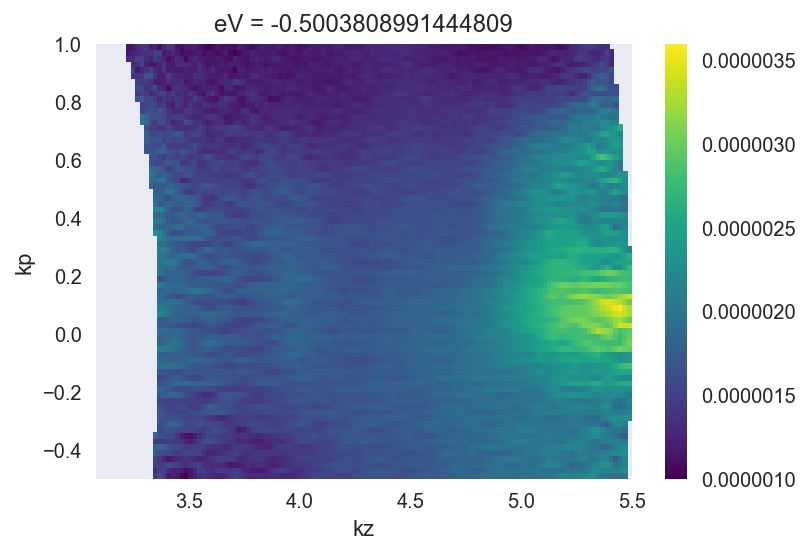

In [64]:
hv_scan.sel(eV=-0.5, method='nearest').sel(kz=slice(3.0, 5.5), kp=slice(-0.5, 1.0)).plot()

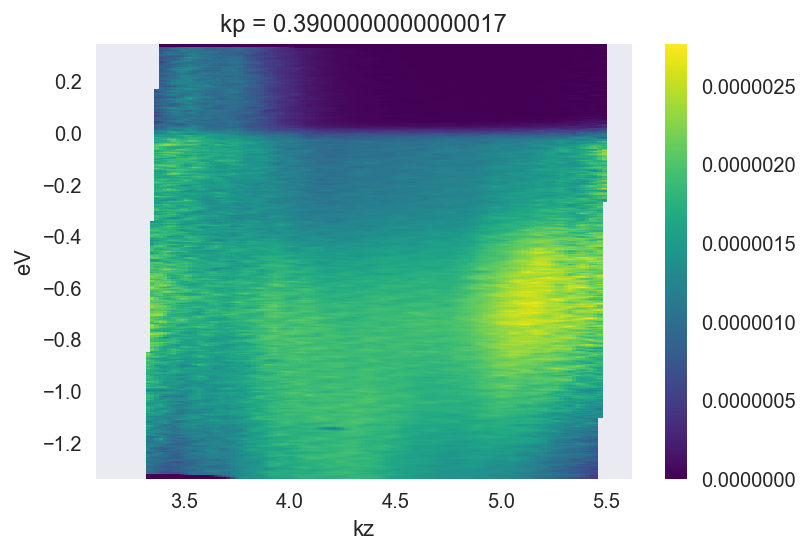

In [65]:
hv_scan.sel(kp=0.4, method='nearest').plot()

In [52]:
raw_hv_scan = load_dataset(datasets[2]['id'])

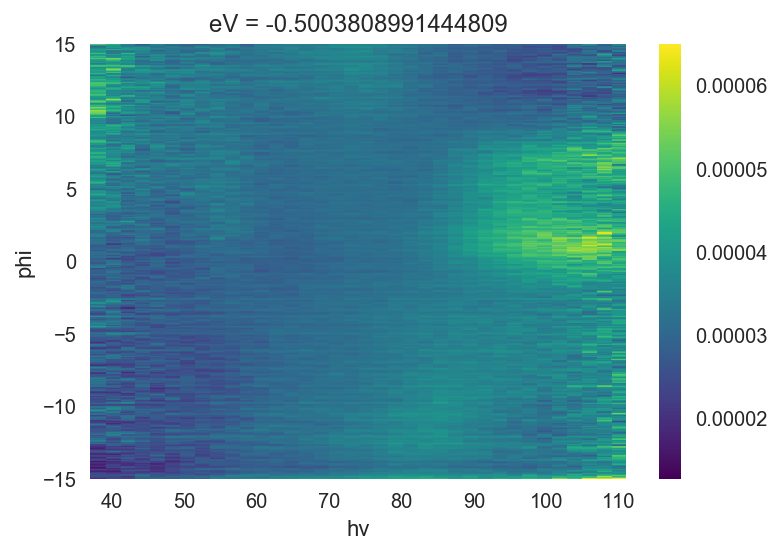

In [54]:
raw_hv_scan = load_dataset(datasets[2]['id'])
from arpes.preparation import normalize_dim
raw_hv_scan = normalize_dim(raw_hv_scan.sel(phi=slice(-15,15)), 'hv')
raw_hv_scan = normalize_dim(raw_hv_scan, 'phi')
raw_hv_scan.sel(eV=-0.5, method='nearest').plot()

/Users/chstansbury/anaconda/envs/python_arpes/lib/python3.5/site-packages/matplotlib/colors.py:1108: RuntimeWarning: invalid value encountered in less
  res_mask = result.data < 0
/Users/chstansbury/anaconda/envs/python_arpes/lib/python3.5/site-packages/matplotlib/colors.py:1119: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[res_mask] = 0


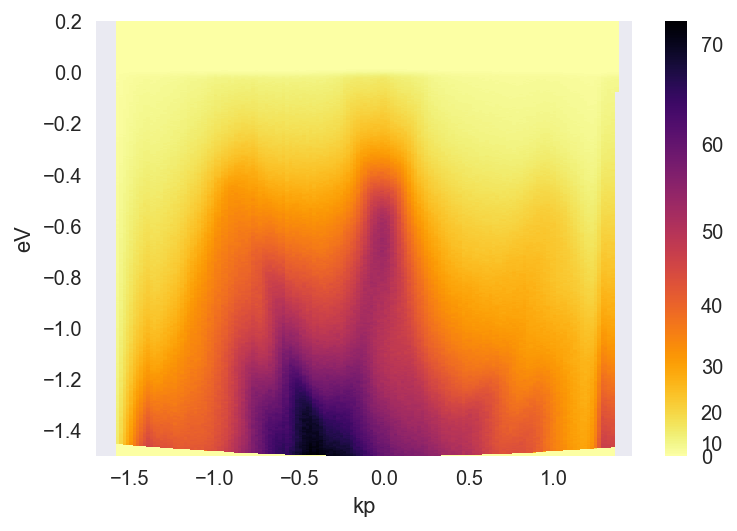

In [121]:
import matplotlib.colors as colors
scan = load_dataset(convert_scan_to_kspace(datasets[-3]['id']))
fig, ax = plt.subplots(1,1)
scan.plot(cmap='inferno_r', norm=colors.PowerNorm(1.8))

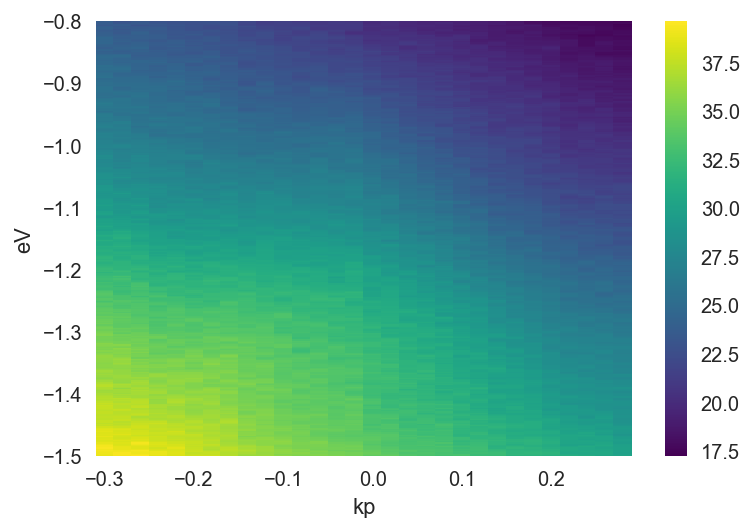

In [90]:
scan.sel(eV=slice(-1.5, -0.8), kp=slice(-0.3, 0.3)).plot()